## Some Investigation on Collected Twitter Data

In [1]:
!git clone https://github.com/overfit-ir/persian-twitter-ner.git

Cloning into 'persian-twitter-ner'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 1883 (delta 40), reused 51 (delta 21), pack-reused 1807
Receiving objects: 100% (1883/1883), 19.56 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (1387/1387), done.


In [2]:
import os

tweets = []
tweet = []
with open('persian-twitter-ner/twitter_data/persian-ner-twitter-data/data.txt', 'r') as file:
    for line_number, line in enumerate(file.readlines()):
        if line != '\n':
            tweet.append(line.replace('\n', '').split('\t'))
        else:
            tweets.append(tweet)
            tweet = []

### Number of Tweets

In [3]:
len(tweets)

7167

### Number of Tokens

In [53]:
len([x for tweet in tweets for x in tweet ])

232917

In [54]:
org_count = len([x for tweet in tweets for x in tweet if 'ORG' in x[1]])
org_count

5122

In [55]:
per_count = len([x for tweet in tweets for x in tweet if 'PER' in x[1]])
per_count

9586

In [57]:
loc_count = len([x for tweet in tweets for x in tweet if 'LOC' in x[1]])
loc_count

6676

In [58]:
nat_count = len([x for tweet in tweets for x in tweet if 'NAT' in x[1]])
nat_count

956

In [59]:
eve_count = len([x for tweet in tweets for x in tweet if 'EVE' in x[1]])
eve_count

1146

In [60]:
pog_count = len([x for tweet in tweets for x in tweet if 'POG' in x[1]])
pog_count

575

In [61]:
pog_count + eve_count + nat_count + loc_count + per_count + org_count

24061

In [ ]:
length_of_tweets = [len(x) for x in tweets]

In [ ]:
sum(length_of_tweets)/len(length_of_tweets)

32.49400111607143

### Train, Test, Dev Split

In [ ]:
import random

test_tweets_index = []
dev_tweets_index = []
random_index = []
for i in range(800):
    random_index.append(random.randrange(0, len(tweets)))

for i in range(400):
    index = random.randrange(0, 800)
    test_tweets_index.append(random_index[index])

for i in range(len(random_index)):
    if random_index[i] not in test_tweets_index:
        dev_tweets_index.append(random_index[i])

train, test, dev = [], [], []
for i, tweet in enumerate(tweets):
    if i in test_tweets_index:
        test.append(tweet)
    elif i in dev_tweets_index:
        dev.append(tweet)
    else:
        train.append(tweet)

In [ ]:
len(test)

303

In [ ]:
len(dev)

447

In [ ]:
len(train)

6418

In [ ]:
len([x for tweet in test for x in tweet ])

10000

In [ ]:
len([x for tweet in dev for x in tweet ])

14927

In [ ]:
len([x for tweet in train for x in tweet ])

207990

In [ ]:
len([x for tweet in train for x in tweet if 'EVE' in x[1]])

1068

In [ ]:
len([x for tweet in test for x in tweet if 'EVE' in x[1]])

35

In [ ]:
len([x for tweet in dev for x in tweet if 'EVE' in x[1]])

43

In [ ]:
len([x for tweet in train for x in tweet if 'ORG' in x[1]])

4552

In [ ]:
len([x for tweet in test for x in tweet if 'ORG' in x[1]])

243

In [ ]:
len([x for tweet in test for x in tweet if 'ORG' in x[1]])

243

In [ ]:
len([x for tweet in train for x in tweet if 'LOC' in x[1]])

5974

In [ ]:
len([x for tweet in test for x in tweet if 'LOC' in x[1]])

268

In [ ]:
len([x for tweet in dev for x in tweet if 'LOC' in x[1]])

434

In [ ]:
len([x for tweet in train for x in tweet if 'PER' in x[1]])

8624

In [ ]:
len([x for tweet in test for x in tweet if 'PER' in x[1]])

365

In [ ]:
len([x for tweet in dev for x in tweet if 'PER' in x[1]])

597

In [ ]:
len([x for tweet in train for x in tweet if 'NAT' in x[1]])

868

In [ ]:
len([x for tweet in test for x in tweet if 'NAT' in x[1]])

30

In [ ]:
len([x for tweet in dev for x in tweet if 'NAT' in x[1]])

58

In [ ]:
len([x for tweet in train for x in tweet if 'POG' in x[1]])

523

In [ ]:
len([x for tweet in test for x in tweet if 'POG' in x[1]])

32

In [ ]:
len([x for tweet in dev for x in tweet if 'POG' in x[1]])

20

In [ ]:
length_of_tweets = [len(x) for x in train]
sum(length_of_tweets)/len(train)

32.40729199127454

In [ ]:
length_of_tweets = [len(x) for x in test]
sum(length_of_tweets)/len(test)

33.00330033003301

In [ ]:
with open('train.txt', 'w') as file:
    for tweet in train:
        for word_token in tweet:
            file.write(word_token[0]+'\t'+word_token[1]+'\n')
        file.write('\n')

In [ ]:
length_of_tweets = [len(x) for x in dev]
sum(length_of_tweets)/len(dev)

33.39373601789709

In [ ]:
with open('test.txt', 'w') as file:
    for tweet in test:
        for word_token in tweet:
            file.write(word_token[0]+'\t'+word_token[1]+'\n')
        file.write('\n')

In [ ]:
with open('dev.txt', 'w') as file:
    for tweet in dev:
        for word_token in tweet:
            file.write(word_token[0]+'\t'+word_token[1]+'\n')
        file.write('\n')

### Category Classification

In [4]:
!pip install -q transformers

     |████████████████████████████████| 2.2MB 5.8MB/s 
     |████████████████████████████████| 870kB 29.9MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 


In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

In [12]:
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-fa-base-uncased-clf-persiannews")
model = AutoModelForSequenceClassification.from_pretrained("HooshvareLab/bert-fa-base-uncased-clf-persiannews")
model.eval()
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [13]:
classifier('محمودی به سمت مدیرعامل بورس منصوب شد')

[{'label': 'اقتصادی', 'score': 0.8937085866928101}]

In [27]:
politics_tweets = []
economics_tweets = []
sports_tweets = []
cultural_tweets = []
tech_tweets = []
inter_tweets = []
health_tweets = []
society_tweets = []

for i, tweet in enumerate(tweets):
  if i%100==0:
    print(i)
    print('politics_counter  : ', len(politics_tweets))
    print('economics_counter : ', len(economics_tweets))
    print('sports_counter    : ', len(sports_tweets))
    print('cultural_counter  : ', len(cultural_tweets))
    print('tech_counter      : ', len(tech_tweets))
    print('inter_counter     : ', len(inter_tweets))
    print('health_counter    : ', len(health_tweets))
    print('society_counter   : ', len(society_tweets))


  label = classifier(' '.join([x[0] for x in tweet]))[0]['label']
  if label == 'سیاسی':
    politics_tweets.append(tweet)
  elif label == 'اقتصادی':
    economics_tweets.append(tweet)
  elif label == 'ورزشی':
    sports_tweets.append(tweet)
  elif label == 'فرهنگی هنری':
    cultural_tweets.append(tweet)
  elif label == 'علمی فناوری':
    tech_tweets.append(tweet)
  elif label == 'بین الملل':
    inter_tweets.append(tweet)
  elif label == 'پزشکی':
    health_tweets.append(tweet)
  elif label == 'اجتماعی':
    society_tweets.append(tweet)
  else:
    print(label)

0
politics_counter  :  0
economics_counter :  0
sports_counter    :  0
cultural_counter  :  0
tech_counter      :  0
inter_counter     :  0
health_counter    :  0
society_counter   :  0
100
politics_counter  :  18
economics_counter :  11
sports_counter    :  7
cultural_counter  :  22
tech_counter      :  10
inter_counter     :  6
health_counter    :  7
society_counter   :  19
200
politics_counter  :  27
economics_counter :  18
sports_counter    :  21
cultural_counter  :  44
tech_counter      :  29
inter_counter     :  11
health_counter    :  11
society_counter   :  39
300
politics_counter  :  41
economics_counter :  23
sports_counter    :  37
cultural_counter  :  70
tech_counter      :  47
inter_counter     :  16
health_counter    :  15
society_counter   :  51
400
politics_counter  :  60
economics_counter :  30
sports_counter    :  50
cultural_counter  :  92
tech_counter      :  56
inter_counter     :  22
health_counter    :  21
society_counter   :  69
500
politics_counter  :  72
econo

In [72]:
import pandas as pd

In [77]:
s = pd.Series([
    len(politics_tweets)+len(inter_tweets),
    len(economics_tweets),
    len(sports_tweets),
    len(cultural_tweets),
    len(tech_tweets),
    len(health_tweets),
    len(society_tweets)],
    index=['سیاسی', 'اقتصادی', 'ورزشی', 'فرهنگ و هنر', 'فناوری', 'سلامت', 'اجتماعی']
)

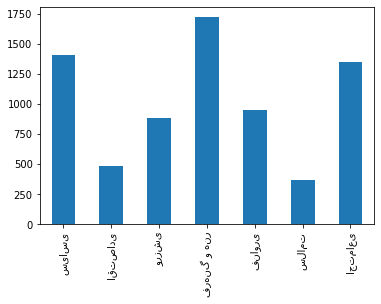

In [80]:
s.plot.bar()